# 3.1 - Ingenieria de caracteristicas


**Regresion Lineal . Ecuacion de la recta**

$$y = m·x+b$$

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

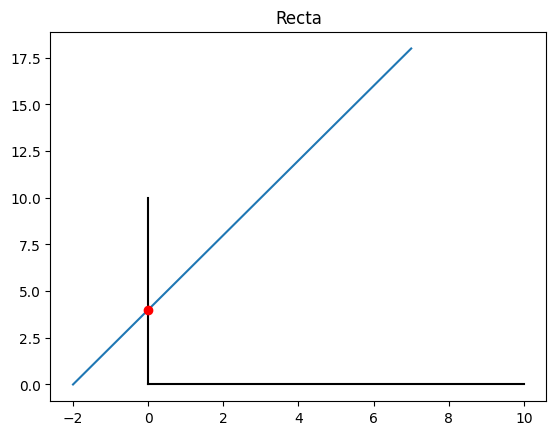

In [2]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente: $\beta = (X^{T}X)^{-1}X^{T}Y$
+ Minimos cuadrados

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [4]:
auto=pd.read_csv('../data/auto-mpg.csv')

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [5]:
x=sm.add_constant(auto.acceleration)

y=auto.mpg

modelo=sm.OLS(y, x).fit()

In [6]:
pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.82e-18
Time:                        09:20:22   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

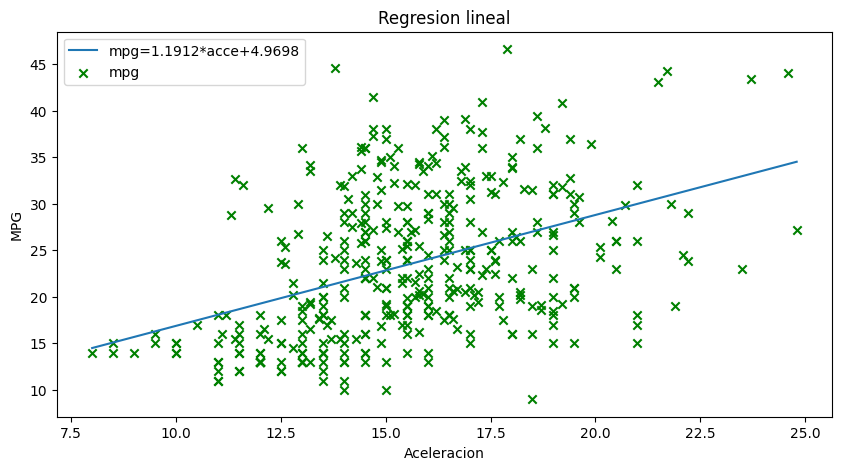

In [7]:
# plot

x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=1.1912*x + 4.9698

plt.figure(figsize=(10, 5))

# la recta de ajuste
plt.plot(x, y, label='mpg={}*acce+{}'.format(1.1912, 4.9698))

# datos
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [17]:
# varias variables

x=sm.add_constant(auto[[
    
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
    
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     830.4
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          3.26e-142
Time:                        09:32:13   Log-Likelihood:                -1054.3
No. Observations:                 398   AIC:                             2115.
Df Residuals:                     395   BIC:                             2127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1980      3.968     -3.578      0.000     -21.998      -6.398
weight        -0.0067      0.000    -31.161      0.000      -0.007      -0.006
model_year     0.7566      0.049     15.447      0.000       0.660       0.853
==============================================================================
Omnibus:                       41.827   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.734
Skew:                           0.665   Prob(JB):                     1.19e-15
Kurtosis:                       4.541   Cond. No.                     7.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**los coeficientes, son los pesos de las caracteristicas**

In [19]:
from sklearn.linear_model import LinearRegression as LinReg

In [20]:
auto=auto.dropna()

X=auto.drop('mpg', axis=1)._get_numeric_data()

y=auto.mpg

In [21]:
modelo=LinReg()

modelo.fit(X, y)

LinearRegression()

In [22]:
modelo.intercept_    # beta 0, la ordenada en el origen

-14.53525048050604

In [24]:
dict(zip(X.columns, modelo.coef_))

{'cylinders': -0.3298590890739662,
 'displacement': 0.007678430243919012,
 'horse_power': -0.00039135557376073177,
 'weight': -0.006794617913375033,
 'acceleration': 0.08527324694722949,
 'model_year': 0.7533671797501017}

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X_norm=StandardScaler().fit_transform(X)

linreg=LinReg().fit(X_norm, y)

In [29]:
dict(zip(X.columns, linreg.coef_))

{'cylinders': -0.5619499609544034,
 'displacement': 0.8024761554073674,
 'horse_power': -0.015044503769495673,
 'weight': -5.763999713309913,
 'acceleration': 0.2349570366233119,
 'model_year': 2.7716641465252847}

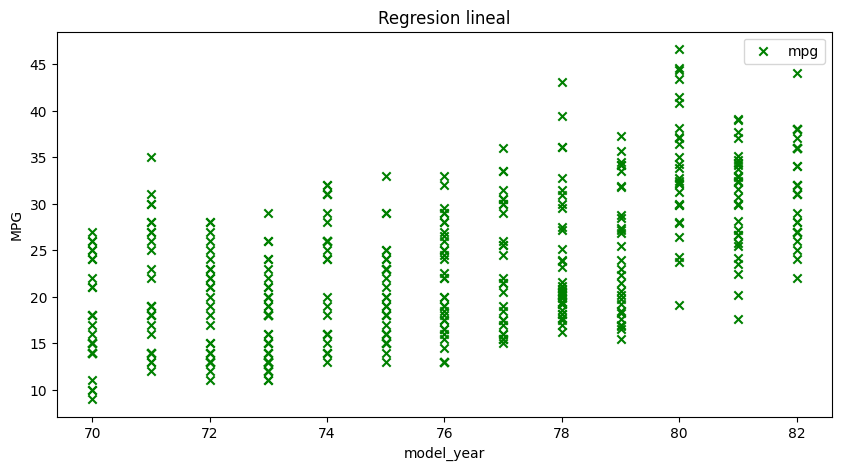

In [30]:
# plot

x=np.linspace(auto.model_year.min(), auto.model_year.max(), 50)

plt.figure(figsize=(10, 5))


# datos
plt.scatter(auto.model_year, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('model_year')
plt.ylabel('MPG')
plt.legend()
plt.show();

## Regresion Logistica


$$y=\frac{1}{1 + e^{-(\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n)}}$$

El objetivo de la regresion logistica es obtener los $\beta$.

In [31]:
iris=pd.read_csv('../data/iris.csv')

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [32]:
iris.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [33]:
dictio={'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

iris.variety=iris.variety.apply(lambda x: dictio[x])

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
X=iris.drop('variety', axis=1)

y=iris.variety

In [35]:
from sklearn.linear_model import LogisticRegression as LogReg

In [37]:
logreg=LogReg().fit(X, y)

In [38]:
logreg.intercept_

array([  9.84207233,   2.219372  , -12.06144433])

In [42]:
dict(zip(X.columns, logreg.coef_.T))

{'sepal.length': array([-0.4195194 ,  0.53150951, -0.1119901 ]),
 'sepal.width': array([ 0.96754257, -0.31505217, -0.6524904 ]),
 'petal.length': array([-2.52052224, -0.20105666,  2.7215789 ]),
 'petal.width': array([-1.08434372, -0.94775241,  2.03209612])}

In [43]:
X_norm=StandardScaler().fit_transform(X)

logreg=LogReg().fit(X_norm, y)

In [44]:
logreg.intercept_

array([-0.20531681,  2.07486525, -1.86954844])

In [45]:
{'Setosa': dict(zip(X.columns, logreg.coef_[0])),
 
'Versicolor': dict(zip(X.columns, logreg.coef_[1])),
 
'Virginica': dict(zip(X.columns, logreg.coef_[2]))}


{'Setosa': {'sepal.length': -1.074041485836016,
  'sepal.width': 1.1600634216479493,
  'petal.length': -1.930628658578718,
  'petal.width': -1.8116887259627752},
 'Versicolor': {'sepal.length': 0.5878005069939083,
  'sepal.width': -0.36182376888101353,
  'petal.length': -0.36346274208575435,
  'petal.width': -0.826192889008061},
 'Virginica': {'sepal.length': 0.4862409788421073,
  'sepal.width': -0.7982396527669369,
  'petal.length': 2.2940914006644726,
  'petal.width': 2.6378816149708384}}

## Decision Tree - Random Forest

In [46]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [47]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [48]:
# dtr

X=auto.drop(columns=['mpg', 'car_name'])

y=auto.mpg

In [49]:
dtr=DTR().fit(X, y)

In [53]:
dict(zip(X.columns, dtr.feature_importances_*100))

{'cylinders': 0.3711201665549492,
 'displacement': 60.208139030280805,
 'horse_power': 17.210812269000613,
 'weight': 8.059494849900789,
 'acceleration': 2.9432380334177064,
 'model_year': 11.207195650845145}

In [52]:
sum(dtr.feature_importances_)

1.0

In [54]:
X_norm=StandardScaler().fit_transform(X)

dtr=DTR().fit(X_norm, y)

In [55]:
dict(zip(X.columns, dtr.feature_importances_*100))

{'cylinders': 0.08756037498731813,
 'displacement': 60.48554893724906,
 'horse_power': 16.893570441466142,
 'weight': 7.873688558931456,
 'acceleration': 3.3964034130451064,
 'model_year': 11.263228274320909}

In [56]:
rfr=RFR(n_estimators=2000).fit(X_norm, y)

In [59]:
dict(zip(X.columns, rfr.feature_importances_*100))   # de media

{'cylinders': 17.542341029923058,
 'displacement': 34.25598626044338,
 'horse_power': 12.462689135243343,
 'weight': 20.538165147066398,
 'acceleration': 3.024117218047358,
 'model_year': 12.176701209276462}

In [58]:
sum(rfr.feature_importances_)

1.0

In [61]:
rfr.estimators_[0].feature_importances_

array([5.52672097e-04, 5.95512084e-01, 1.37937199e-01, 1.15618594e-01,
       3.55886807e-02, 1.14790770e-01])

In [62]:
[tree.feature_importances_ for tree in rfr.estimators_][:3]

[array([5.52672097e-04, 5.95512084e-01, 1.37937199e-01, 1.15618594e-01,
        3.55886807e-02, 1.14790770e-01]),
 array([0.63299817, 0.02151277, 0.02851044, 0.16582948, 0.02348477,
        0.12766437]),
 array([0.00102227, 0.62003058, 0.04613638, 0.17624421, 0.03587544,
        0.12069112])]